***Библиотеки и данные***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(open('data_description.txt').read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

***Первичный анализ***

Вид, отделка, год посмотройки и тд гаража предположительно можно убрать, оставив только общую оценку и состояние


Аналогично для др

***Подготовка данных***

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


*Заполнение пропусков*

In [5]:
pd.unique(data.dtypes)

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
cat = []
num = []

for x in data.columns:
    if data.dtypes[x]=='object':
        cat.append(x)
    else:
        num.append(x)

In [7]:
for x in data.columns:
    nulls = data[x].isnull().sum()
    nulls_proc = nulls/data.shape[0]*100
    if nulls != 0:
        print(x, ': ', round(nulls_proc,2), '%', sep='')
        if x in cat:
            print(data[x].unique())
        print('\n')

LotFrontage: 17.74%


Alley: 93.77%
[nan 'Grvl' 'Pave']


MasVnrType: 0.55%
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


MasVnrArea: 0.55%


BsmtQual: 2.53%
['Gd' 'TA' 'Ex' nan 'Fa']


BsmtCond: 2.53%
['TA' 'Gd' nan 'Fa' 'Po']


BsmtExposure: 2.6%
['No' 'Gd' 'Mn' 'Av' nan]


BsmtFinType1: 2.53%
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


BsmtFinType2: 2.6%
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


Electrical: 0.07%
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


FireplaceQu: 47.26%
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


GarageType: 5.55%
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


GarageYrBlt: 5.55%


GarageFinish: 5.55%
['RFn' 'Unf' 'Fin' nan]


GarageQual: 5.55%
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


GarageCond: 5.55%
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


PoolQC: 99.52%
[nan 'Ex' 'Fa' 'Gd']


Fence: 80.75%
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


MiscFeature: 96.3%
[nan 'Shed' 'Gar2' 'Othr' 'TenC']




В фичах, где вариант отсутствующего значения предусмотен, заменяем nan на строку 'NA' (0 в случае LotFrontage), в остальных случаях пропуски заполяем модой/медианой

In [8]:
data['LotFrontage'] = data['LotFrontage'].replace(np.nan, 0)

In [77]:
data['Alley'] = data['Alley'].replace(np.nan, 'NA')

In [9]:
data['MasVnrType'] = data['MasVnrType'].replace(np.nan, data['MasVnrType'].mode()[0])

In [10]:
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan, data['MasVnrArea'].mode()[0])

In [11]:
data['BsmtQual'] = data['BsmtQual'].replace(np.nan, 'NA')

In [12]:
data['BsmtCond'] = data['BsmtCond'].replace(np.nan, 'NA')

In [13]:
data['BsmtExposure'] = data['BsmtExposure'].replace(np.nan, 'NA')

In [14]:
data['BsmtFinType1'] = data['BsmtFinType1'].replace(np.nan, 'NA')

In [15]:
data['BsmtFinType2'] = data['BsmtFinType2'].replace(np.nan, 'NA')

In [16]:
ind=[]
for x,y in data['Electrical'].isnull().to_dict().items():
    if y==True:
        ind.append(x)
pd.set_option('display.max_columns', 81)
data.iloc[ind]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [17]:
pd.reset_option('display.max_columns')

In [18]:
data['Electrical'] = data['Electrical'].replace(np.nan, data['Electrical'].mode()[0])

In [19]:
data['FireplaceQu'] = data['FireplaceQu'].replace(np.nan, 'NA')

In [20]:
data['GarageType'] = data['GarageType'].replace(np.nan, 'NA')

In [21]:
data['GarageYrBlt'] = data['GarageYrBlt'].replace(np.nan, data['GarageYrBlt'].median())

In [22]:
data['GarageFinish'] = data['GarageFinish'].replace(np.nan, 'NA')

In [23]:
data['GarageQual'] = data['GarageQual'].replace(np.nan, 'NA')

In [24]:
data['GarageCond'] = data['GarageQual'].replace(np.nan, 'NA')

In [25]:
data['PoolQC'] = data['PoolQC'].replace(np.nan, 'NA')

In [26]:
data['Fence'] = data['Fence'].replace(np.nan, 'NA')

In [27]:
data['MiscFeature'] = data['MiscFeature'].replace(np.nan, 'NA')

In [28]:
for x in data.columns:
    nulls = data[x].isnull().sum()
nulls

0

*Проверка уникальности строк*

In [29]:
data.duplicated().unique()
data.duplicated(subset='Id').unique()

array([False])

*Контроль выбросов*

*Перебор признаков*

Корреляция для количественных признаков

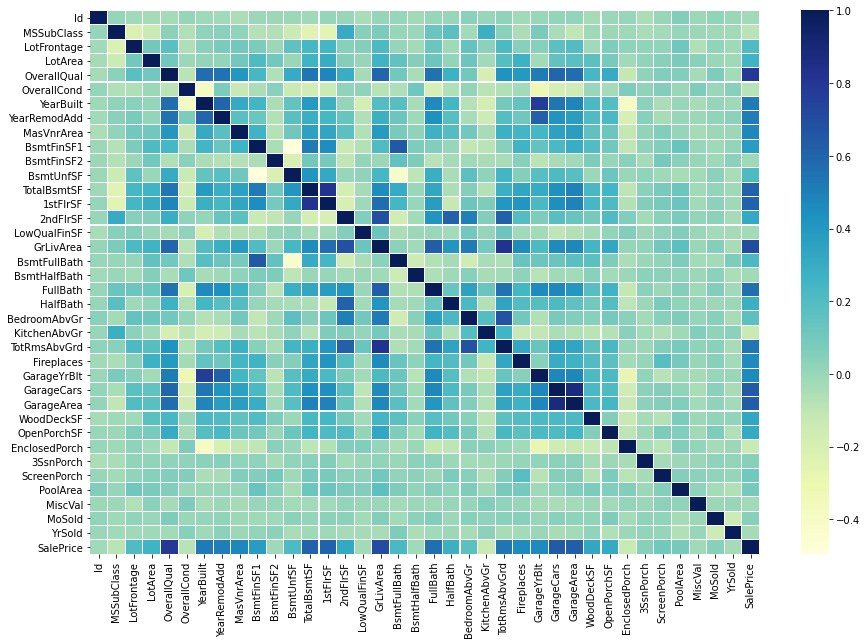

In [30]:
corr = data.corr()
plt.subplots(figsize=(15, 10))
sns.heatmap(corr, cmap='YlGnBu', linewidths=.1)

У некоторых признаков между собой присутствует объяснимая корреляция (напр. год постройки дома/год постройки гаража)

In [31]:
target_corr = data.corr()['SalePrice'].to_frame().sort_values(by='SalePrice', ascending=False)
target_corr[:15].style.background_gradient(cmap='YlGnBu')

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Рассмотрим поближе коррелирующие с таргетом признаки

In [32]:
corr_feats = target_corr.index[:11]
corr_feats = list(corr_feats)
corr_feats

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [33]:
data['YearBuilt'].corr(data['YearRemodAdd'])

0.5928549763436503

In [34]:
data['YearBuilt'].corr(data['OverallQual'])

0.5723227689623615

По тепловой карте видно, что GarageCars и GarageArea коррелируют друг с другом, поэтому оставим только признак GarageCars(можно воспринимать как категориальный, что удобнее)

1stFlrSF повторяет TotalBsmtSF, исключаем его 

FullBath и TotRmsAbvGrd идут рука об руку с общим метражом, тоже не учитываем

YearBuilt и YearRemodAdd имеют большую корреляцию между собой и с OverallQual, чем с таргетом; по логике эти признаки должны иметь вес, но вполне возможно, что они в достаточной мере учтены в общей оценке дома, пока оставим

In [35]:
for x in ['GarageArea', '1stFlrSF', 'FullBath','TotRmsAbvGrd']:
    corr_feats.remove(x) 

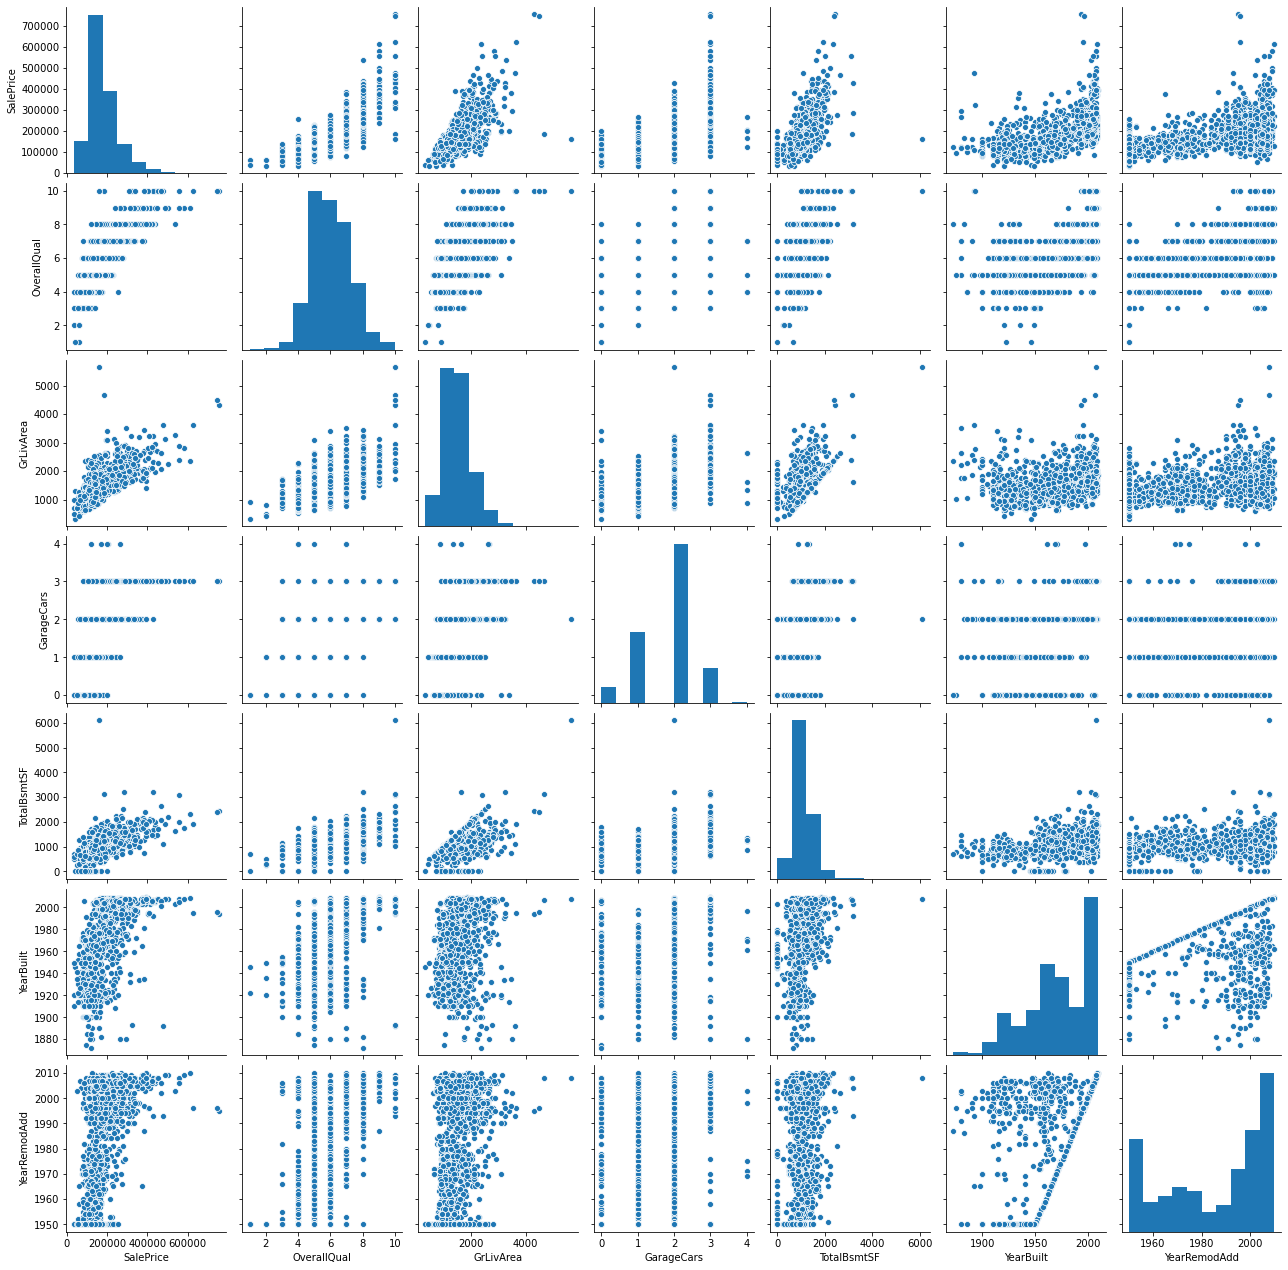

In [36]:
sns.pairplot(data[corr_feats], height=2.5)

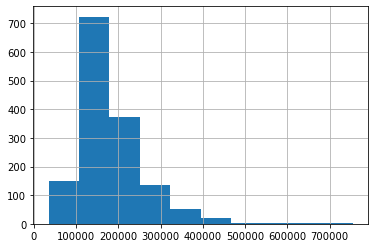

In [37]:
data['SalePrice'].hist()

In [38]:
data['SalePrice'] = np.log(data['SalePrice'])

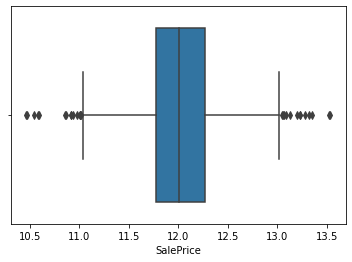

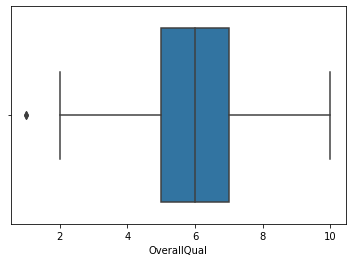

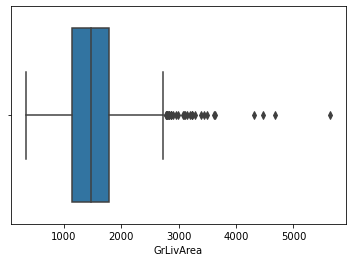

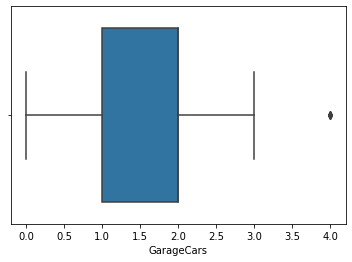

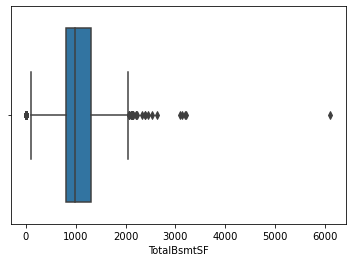

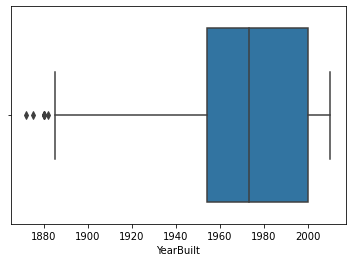

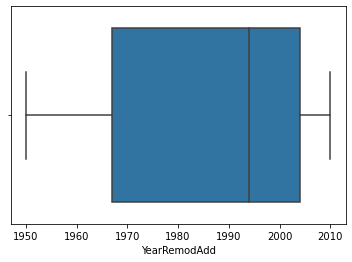

In [39]:
for x in corr_feats:
    plt.show(sns.boxplot(data[x]))

In [40]:
data['SalePrice'] = data['SalePrice'].clip(10.8,13.4)

In [41]:
data['OverallQual'] = data['OverallQual'].clip(2,10)

In [42]:
data['GrLivArea'] = data['GrLivArea'].clip(0,3800)

In [43]:
data['GarageCars'] = data['GarageCars'].clip(0,3)

In [44]:
data['TotalBsmtSF'] = data['TotalBsmtSF'].clip(100,2700)

In [45]:
data['YearBuilt'] = data['YearBuilt'].clip(1900,5000)

In [46]:
data['YearRemodAdd'] = data['YearRemodAdd'].clip(0,5000)

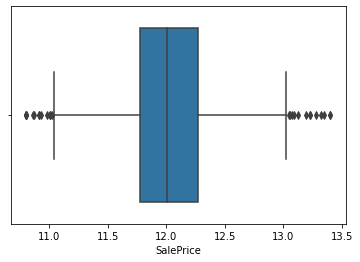

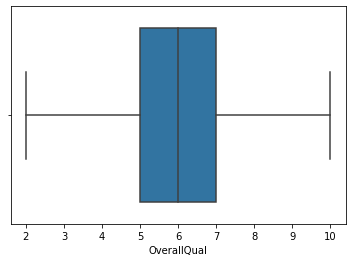

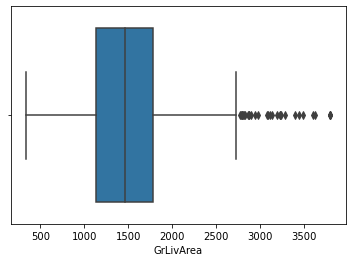

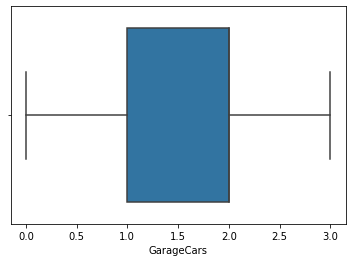

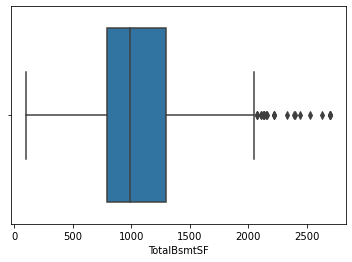

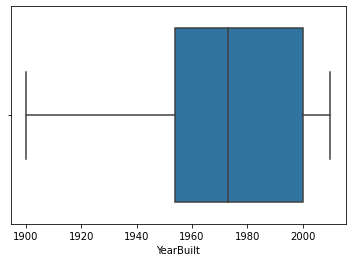

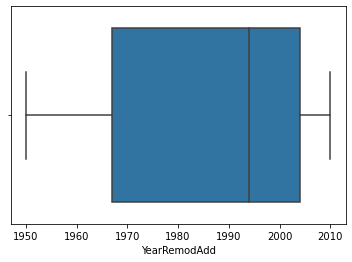

In [47]:
for x in corr_feats:
    plt.show(sns.boxplot(data[x]))

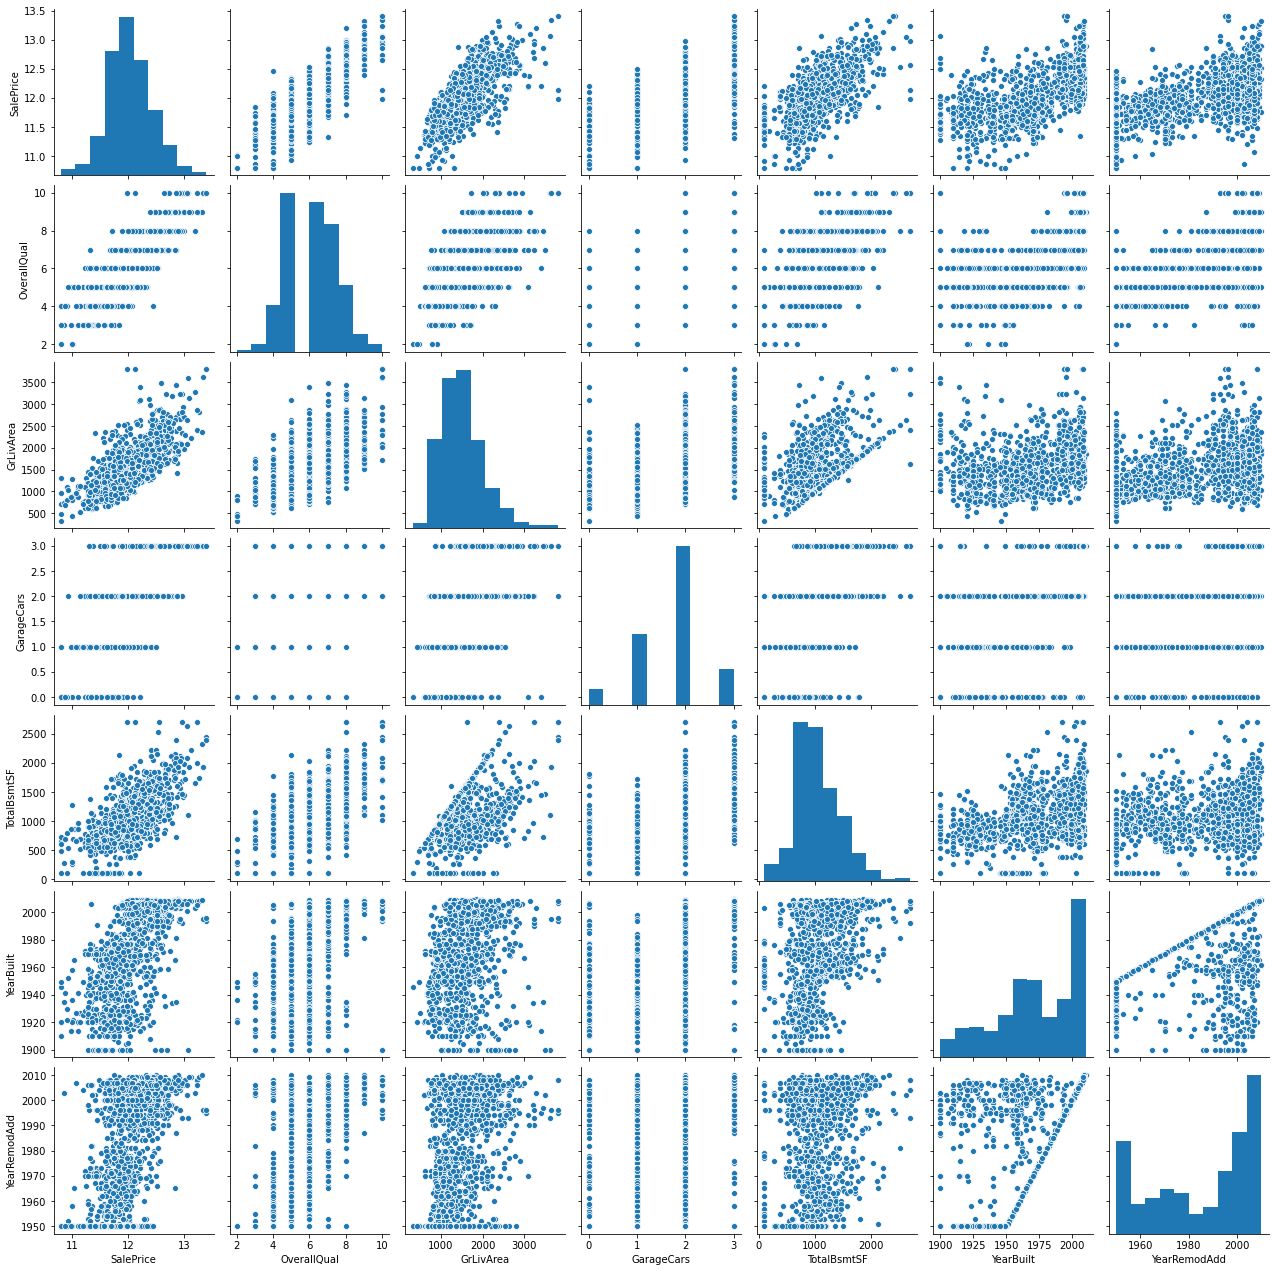

In [48]:
sns.pairplot(data[corr_feats], height=2.5)

Теперь выбранные признаки очень грубо, но выглядят линейно скореелированными с целевой переменной

Разберем категориальные признаки

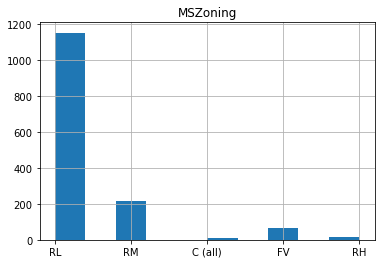

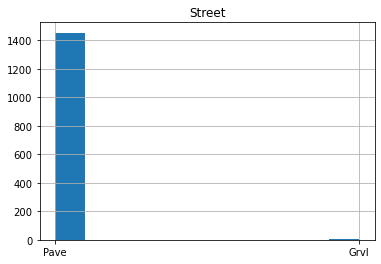

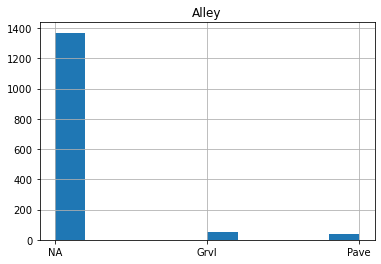

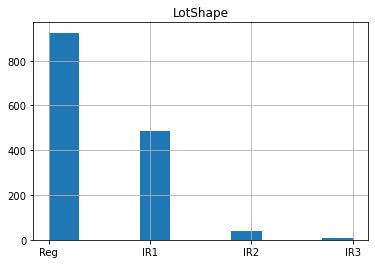

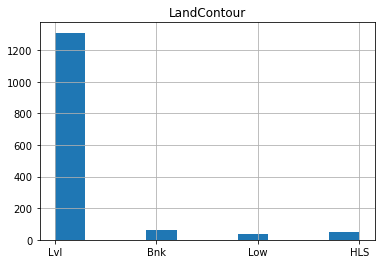

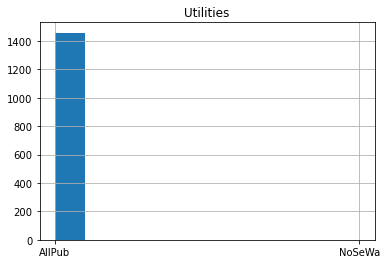

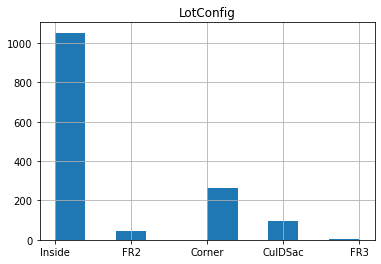

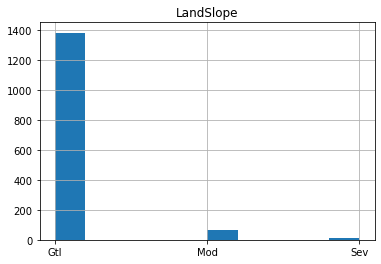

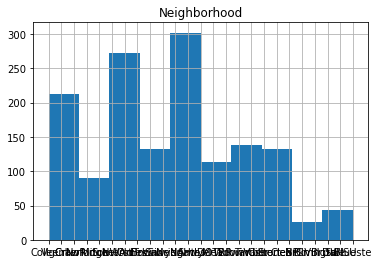

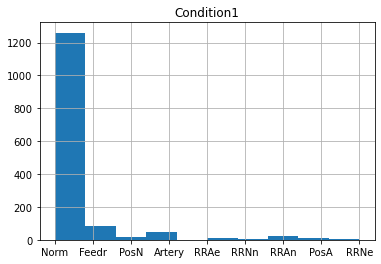

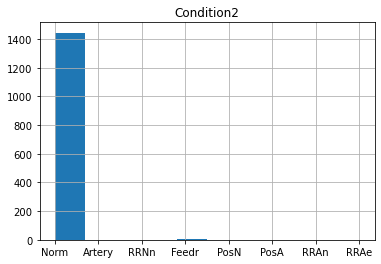

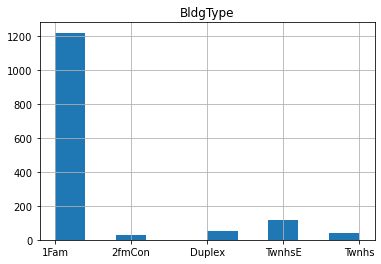

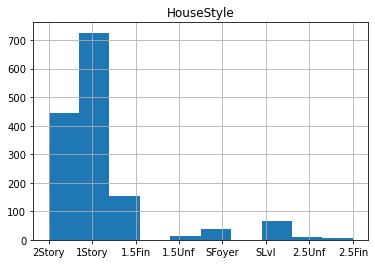

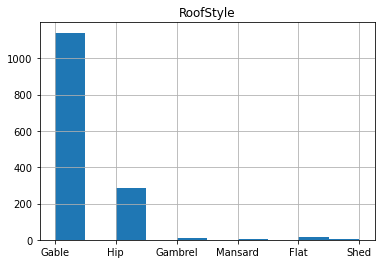

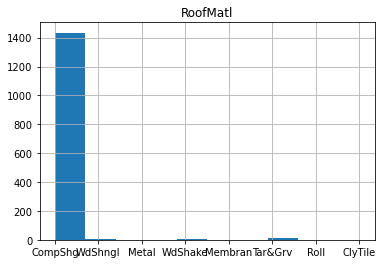

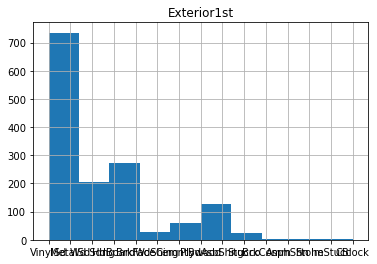

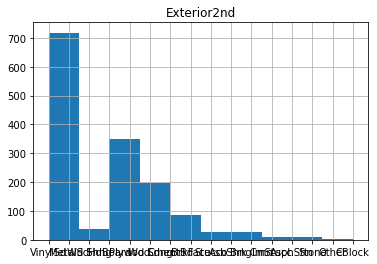

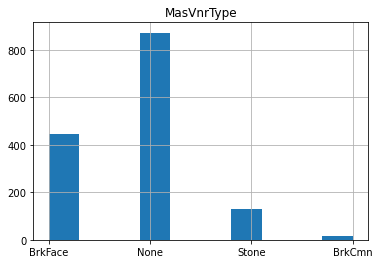

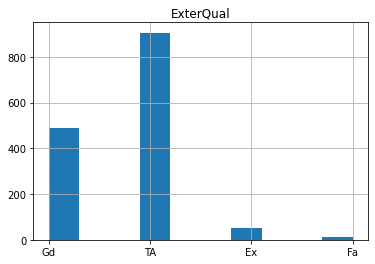

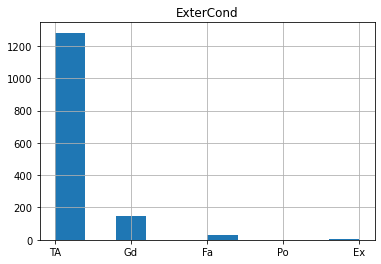

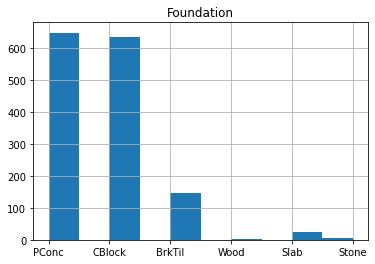

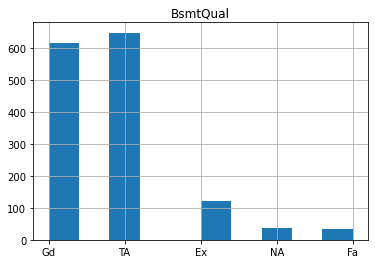

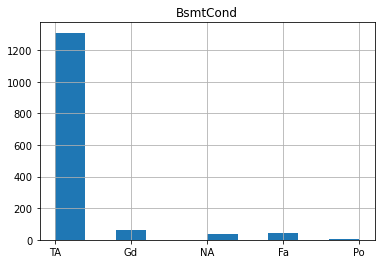

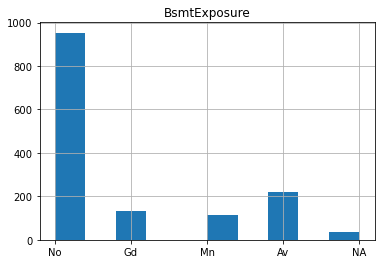

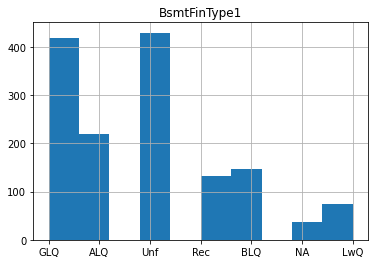

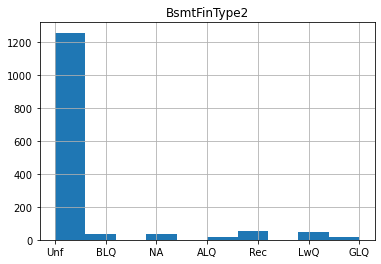

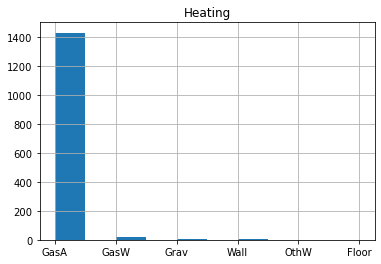

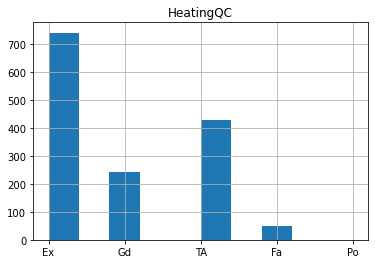

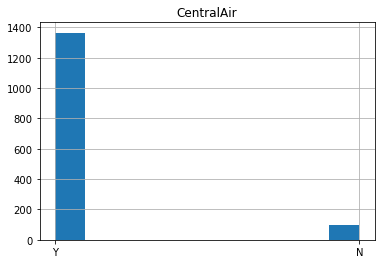

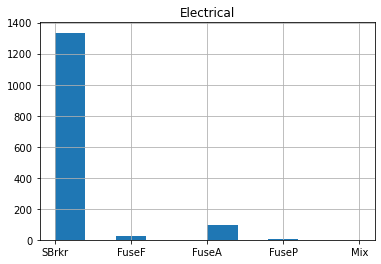

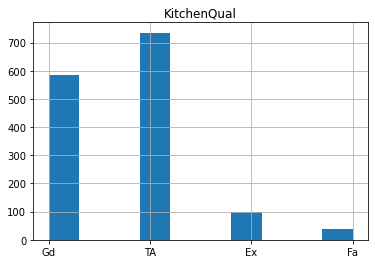

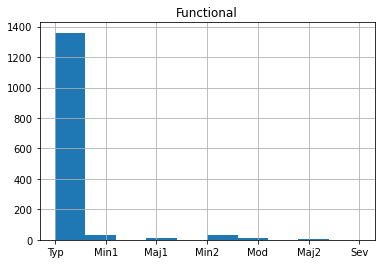

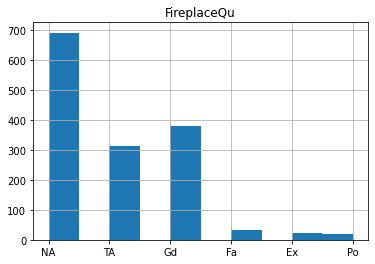

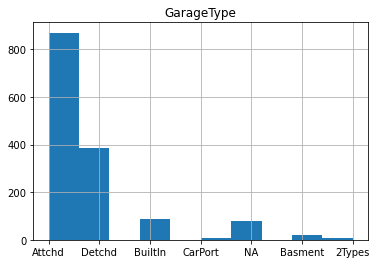

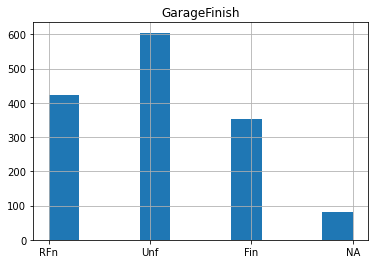

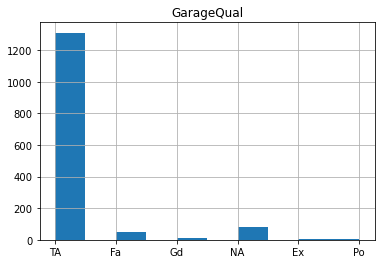

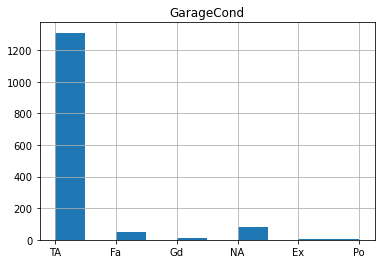

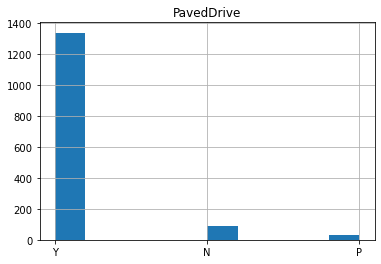

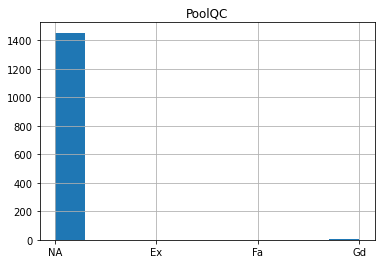

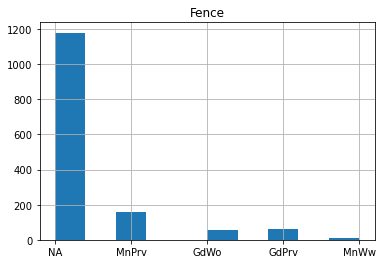

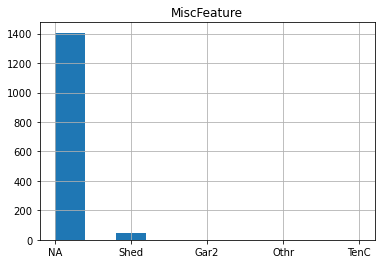

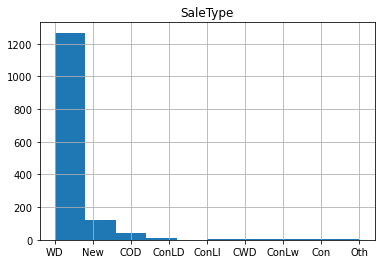

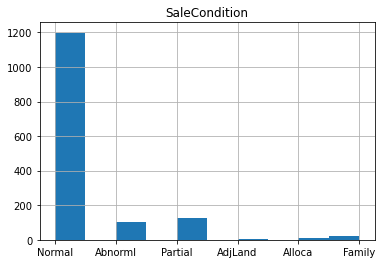

In [78]:
for x in cat:
    plt.title(x)
    plt.show(data[x].hist())

In [83]:
for x in ['Street', 'Alley', 'Utilities', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature']:
    cat.remove(x)

In [140]:
X = pd.get_dummies(data[feat_new].drop(columns='SalePrice'))
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8814584992182654

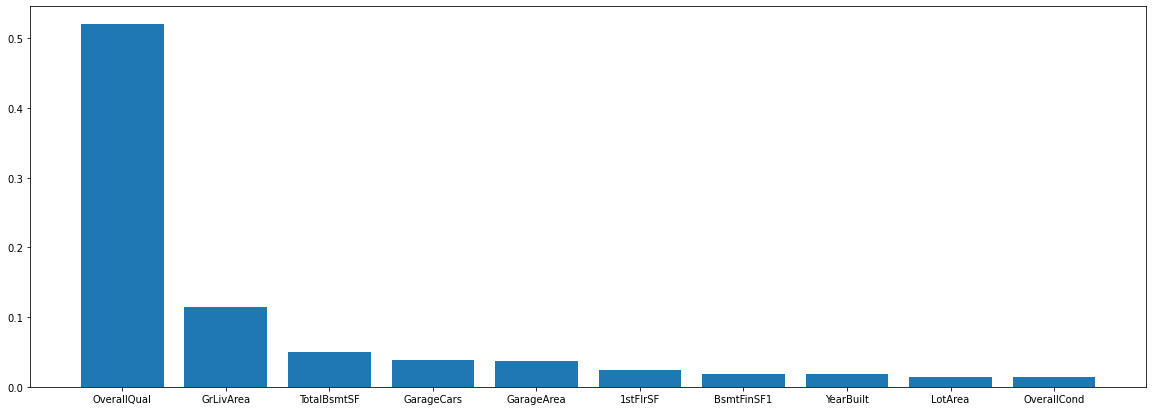

In [150]:
importances = model.feature_importances_
num = 10

features_index = np.argsort(importances)[::-1][:num]

features = {}
for x in range(len(X.columns)):
    features[x] = X.columns[x]

important_features = [features[i] for i in features_index]

plt.figure(figsize=(20, 7))
plt.bar(range(num), importances[features_index])
plt.xticks(range(num), important_features)
plt.show()

In [145]:
X = pd.get_dummies(data.drop(columns='SalePrice'))
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8841192278590086

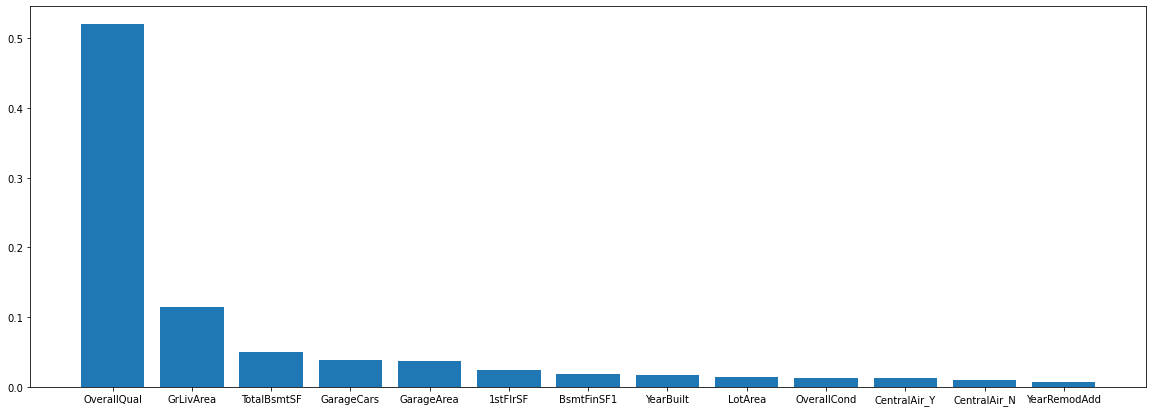

In [152]:
importances = model.feature_importances_
num = 13

features_index = np.argsort(importances)[::-1][:num]
features = {}
for x in range(len(X.columns)):
    features[x] = X.columns[x]

important_features = [features[i] for i in features_index]

plt.figure(figsize=(20, 7))
plt.bar(range(num), importances[features_index])
plt.xticks(range(num), important_features)
plt.show()

In [100]:
base_models = [('LR', LinearRegression()), ('kNR', KNeighborsRegressor()), ('DTR', DecisionTreeRegressor())]
meta_model = GradientBoostingRegressor()

model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [101]:
models = dict(base_models)
models['stack'] = meta_model

for name, model in models.items():
    scores = cross_val_score(model, X, y)
    print(name, round(np.mean(scores), 3))

LR 0.893
kNR 0.658
DTR 0.739
stack 0.902
